# TurnUpVisualization

## Imports 

In [16]:
import numpy as np
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc

## Data Cleanup

In [17]:
# Input data from csv
data = pds.read_csv('No-show-Issue-Comma-300k-corrected.csv')

# Turn gender inot a binary value (Male is 1 and female is 0)
data.Gender = data.Gender.apply(lambda x: 1 if x == 'M' else 0)

# Turn day of the week into a number
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.DayOfTheWeek = data.DayOfTheWeek.apply(lambda x: days.index(x))

Accuracy:  85.1 %
AUC:  0.985052602073


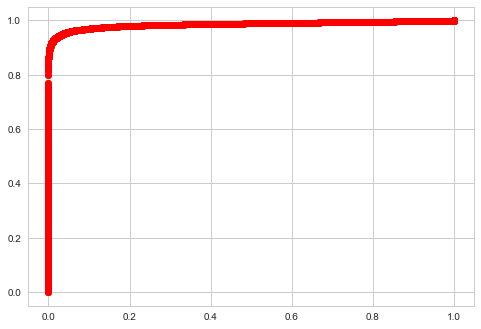

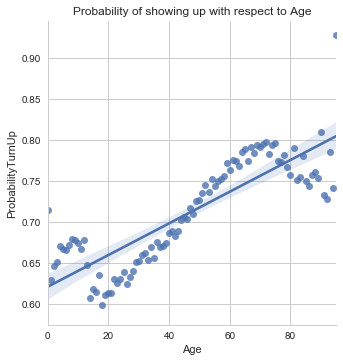

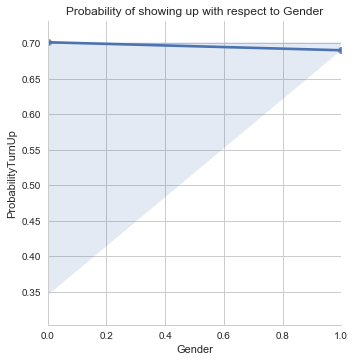

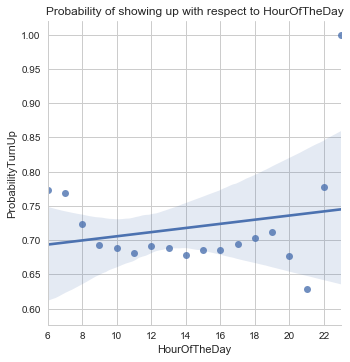

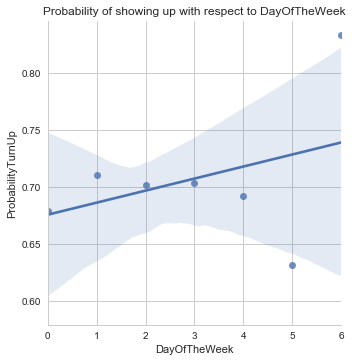

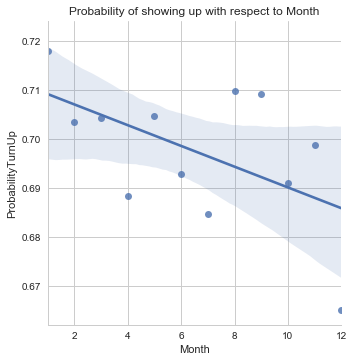

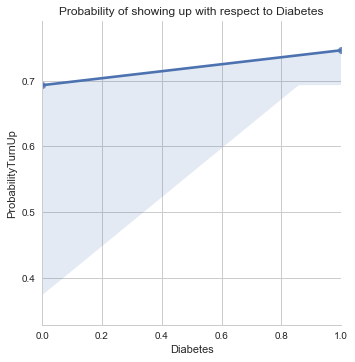

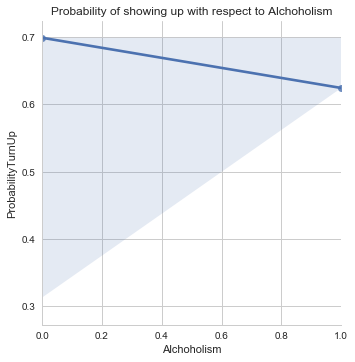

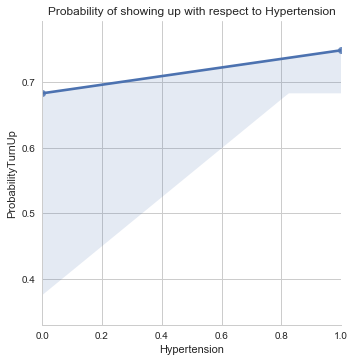

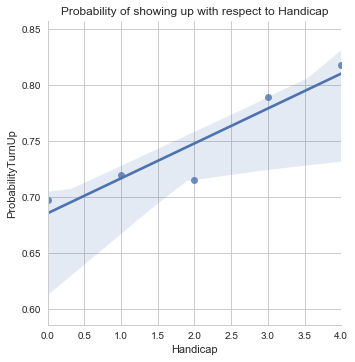

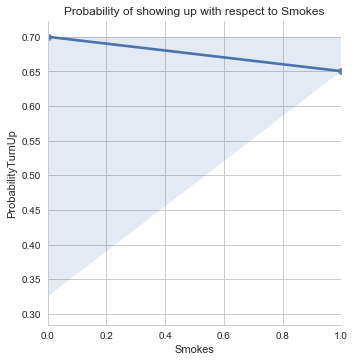

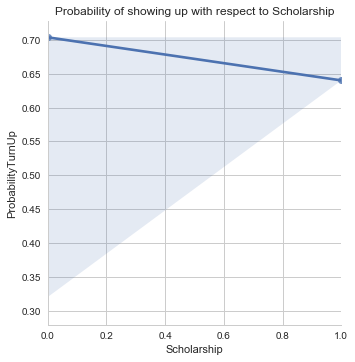

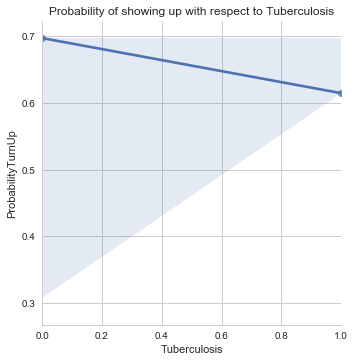

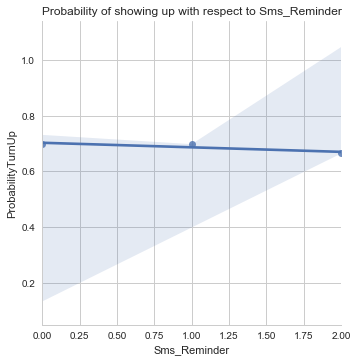

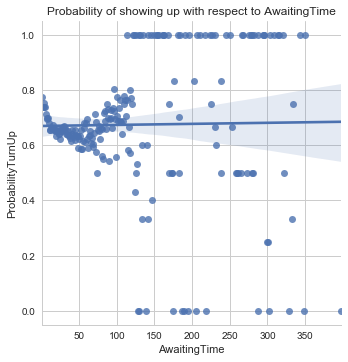

In [33]:
def prob_calc(data, variable):
    df = pds.crosstab(index = data[variable], columns = data.Status).reset_index()
    # print(df)
    df['ProbabilityTurnUp'] = df[1] / (df[0] + df[1])
    return df[[variable, 'ProbabilityTurnUp']]

# Linear regression when chaning only the passed variable
def plot_wrt_variable(data, variable):
    sns.set_style("whitegrid")
    newdata = prob_calc(data, variable)
    sns.lmplot(data = newdata, x = variable, y = 'ProbabilityTurnUp', fit_reg = True)
    from_x = min(list(data[variable]))
    to_x = max(list(data[variable]))
    sns.plt.xlim(from_x, to_x)
    sns.plt.title('Probability of showing up with respect to {}'.format(variable))
    return newdata

# Get list of features
feature_list = list(data)

# Get binary features that needs different charting
binary_feature_list = [
    'Gender',
    'Diabetes',
    'Alchoholism',
    'Hypertension',
    'Handicap',
    'Smokes',
    'Scholarship',
    'Tuberculosis',
    'Sms_Reminder',
]

# Use 80% for training, 20% for testing
total = 296400
train = int(0.8 * total)

# Training Data (select first 80% of rows)
features_train = data[feature_list].iloc[:train]
# Testing Data (select last 20% of rows)
features_test = data[feature_list].iloc[train:]

# Results (outputs) for testing set
testing_output_list = data.Status[train:]
# Results (outputs) for training set
training_output_list = data.Status[:train]

# Multinomial naive bayes classification
clf =  MultinomialNB().fit(features_train, training_output_list)
print('Accuracy: ', round(accuracy_score(testing_output_list, clf.predict(features_test)), 3) * 100, '%')

# Compute and display AUC
results = clf.predict_proba(features_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(testing_output_list, [i[1] for i in results])
roc_auc = auc(fpr, tpr)
print('AUC: ', roc_auc)
plt.plot(fpr, tpr, 'ro')

# Plot how each variable independently affects the probability of showing up
for variable in feature_list:
    if variable != 'Status':
        plot_wrt_variable(data, variable)

sns.plt.show()
plt.show()